<h1> ANN for Regression Examples </h1>
<b>Imports, check moodle for instructions</b>

In [23]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

<b>Load data into frame</b>

In [24]:
df=pd.read_csv("Household energy bill data.csv")
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


<b>Create X and Y</b>

In [25]:
df.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')

In [26]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
# in this case, everything else except the amount_paid
X = df[['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban']]
# have only the target variable here (dependent variable)
# in this case, amount_paid => how big is the electricity bill
y=df[['amount_paid']]

check for removable variables

In [ ]:
correlations = df.corr()
correlations

In [27]:
# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.
# if you want to split the test set into two for a validation set too, try this trick:

#first, train split 70% for training
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=101)

X_val, X_test, y_val, y_test=train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [6]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

700
150
150


In [8]:
# as in Classic ML, it's often a good idea to follow this structure:
# Normalization/standardization -> Regularization -> Rest of the model
# this example does just that
# you can also try LayerNormalization instead of BatchNormalization
# and l2-regularizer instead of l1. depends on situation which work better
#model = keras.Sequential(
#    [
#        layers.BatchNormalization(input_shape=(9,)),
#        layers.Dense(4, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
#        layers.Dense(12, activation="relu"),
#        layers.Dropout(0.1),
#        layers.Dense(8, activation="relu"),
#        layers.Dense(1)
#    ]
#)

In [29]:
var=len(X.columns)

# needed imports:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# create a model checkpoint to a file, and only save the best one
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True)

# combine all active callbacks into a list
# have only those you need, for example only ModelCheckpoint
callback_list = [mc]

# later, we need to attach the callbacks right when we start training
# model.fit(x=X_train, y=y_train, epochs=3000, validation_data=(X_val, y_val), callbacks=callback_list)

# IF USING MODELCHECKPOINT:

# we have to load the model after plotting the training history, and right before evaluation metrics:

# override the last model with the best model version from the history
# from keras.models import load_model
# model = load_model('best_model.keras')

# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
       layers.BatchNormalization(input_shape=(var,)),
       layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
       layers.Dropout(0.1),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 341 (1.33 KB)

 Trainable params: 323 (1.26 KB)

 Non-trainable params: 18 (72.00 B)

In [30]:

# see the instructions on the train/test -split above on how to split the data correctly
model.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_val, y_val), callback)

Epoch 1/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 383613.9688 - val_loss: 377582.3750
Epoch 2/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 392106.9062 - val_loss: 376493.4062
Epoch 3/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 389167.4375 - val_loss: 375117.2188
Epoch 4/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 395336.1875 - val_loss: 373408.6250
Epoch 5/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 404529.2188 - val_loss: 371162.7188
Epoch 6/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 391605.6250 - val_loss: 368331.0938
Epoch 7/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 386454.2812 - val_loss: 364605.9688
Epoch 8/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 396570.5312 - val_loss: 359478.3750
Epoch 9/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 387587.8750 - val_loss: 352823.3750
Epoch 10/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 382424.9375 - val_loss: 344023.5938
Epoch 11/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

<Axes: >

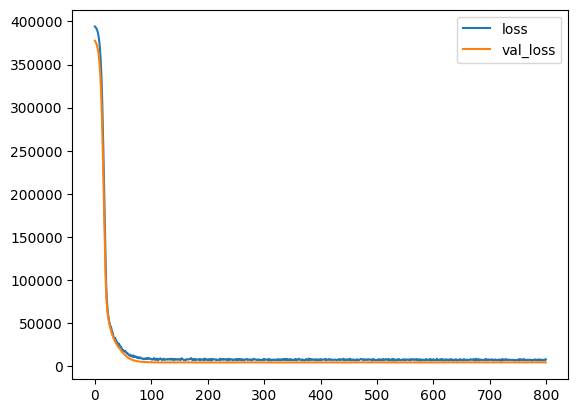

In [31]:
# let's use pandas for this (easy code)
# try to look if the model is actually training 
# => the error is going downwards
# if using validation data, you get two lines
# in this case, see if the lines follow a similar trend 
# (they don't always overlap with complex data, the trend is more important)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


In [32]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
4209.984375

Train data evaluation:
3813.923095703125


In [34]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Test True Y,Model Predictions
0,529.752567,603.378418
1,725.970313,701.703369
2,742.379815,798.589294
3,675.483254,692.980713
4,485.738650,459.313202
...,...,...
145,439.728088,448.668243
146,800.416867,797.735229
147,562.955168,595.376587
148,473.820453,526.673157


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

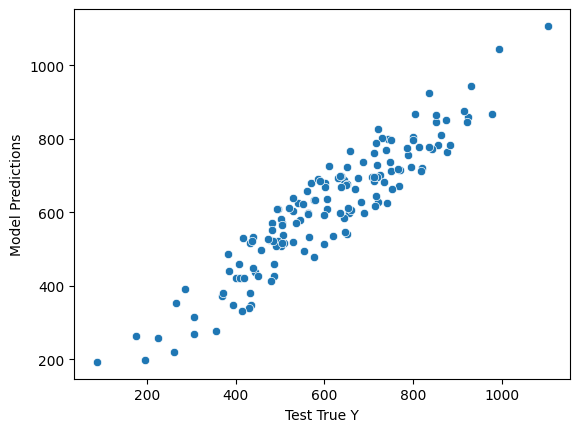

In [35]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [38]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "Unit")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "Unit^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "Unit")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
55.37 Unit

MSE
4200.86 Unit^2

RMSE:
64.81 Unit

R-squared:
0.87

Explained variance score:
0.87


C:\Users\janni\AppData\Local\Temp\ipykernel_10648\3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))
c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\seaborn\distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\numpy\lib\histograms.py:885: Runti

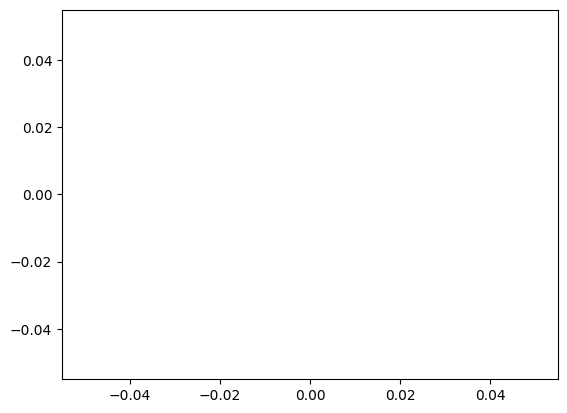

In [41]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [42]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
 'num_rooms':4,
'num_people':3,
'housearea':845,
'is_ac':1, 
'is_tv':1, 
'is_flat':0,
'ave_monthly_income':12000, 
'num_children':1, 
'is_urban':1
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [43]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated Amount Paid:")
print(f"{round(float(result), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

Estimated Amount Paid:
754.97
----------------


C:\Users\janni\AppData\Local\Temp\ipykernel_10648\4124638929.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{round(float(result), 2)}")
